<a href="https://colab.research.google.com/github/AvinashGadpayle/Recession-Analysis-using-Python/blob/main/Recession_Analysis_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

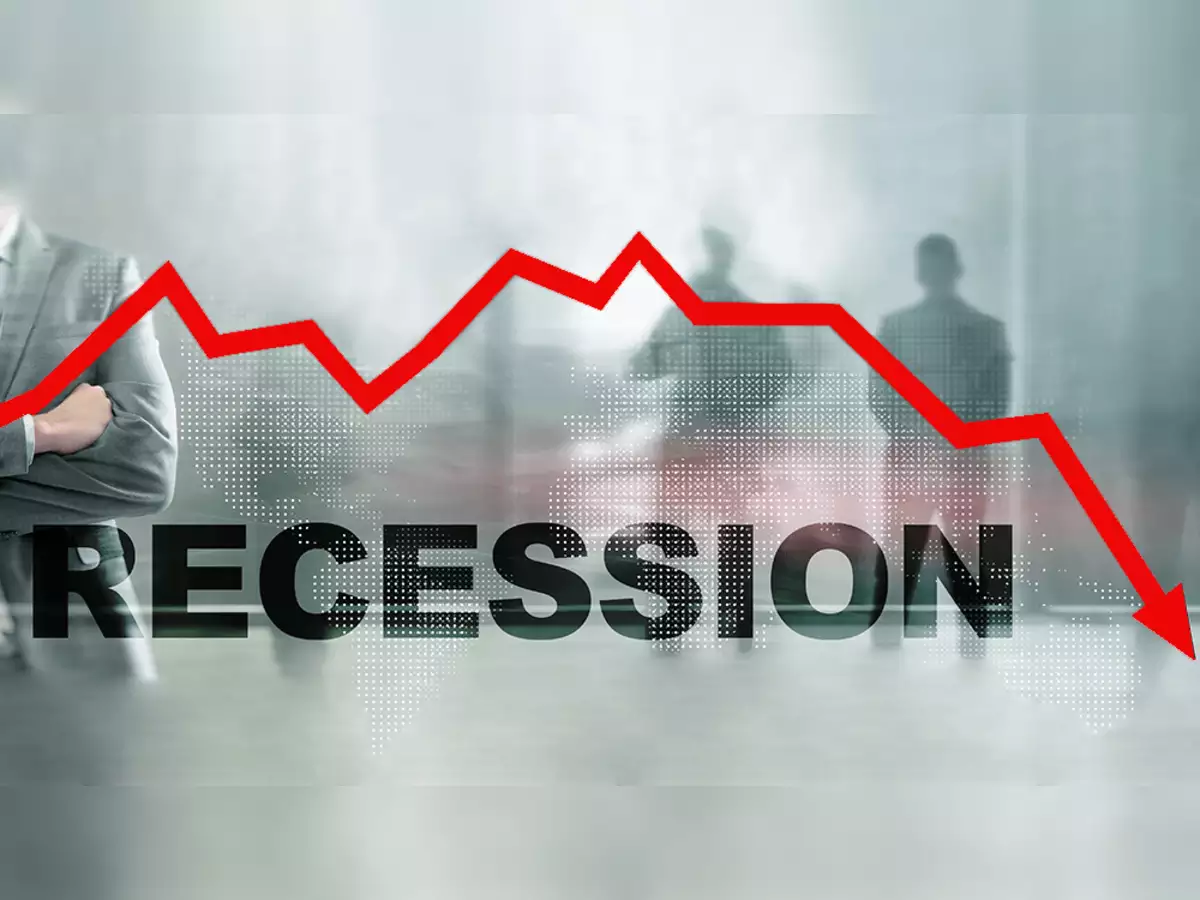

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('UK_monthly_gdp.csv')

In [3]:
df.head(5)

,Time Period,GDP Growth
0,/01/2020,0.3
1,/02/2020,-0.5
2,/03/2020,-7.0
3,/04/2020,-20.9
4,/05/2020,3.2


*Let’s have a look at the GDP growth over time:*

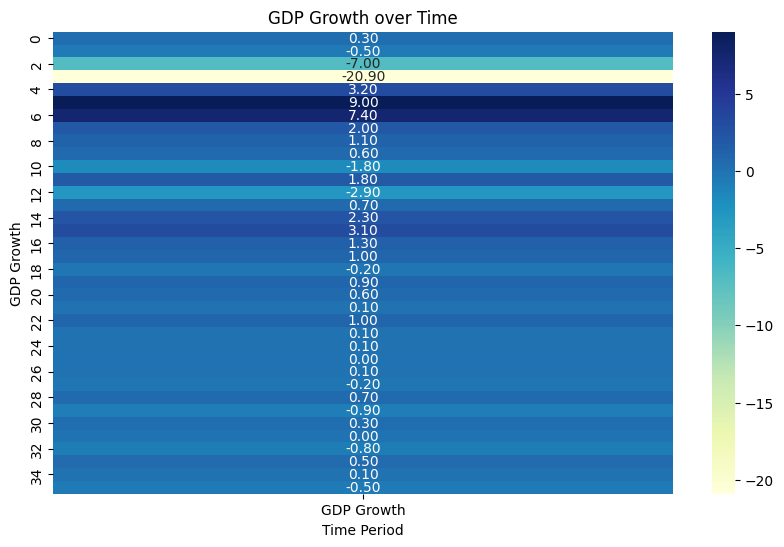

In [4]:
# Filter out non-numeric columns if needed
numeric_columns = df.select_dtypes(include='number')

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_columns, cmap='YlGnBu', annot=True, fmt=".2f", cbar=True)

plt.title('GDP Growth over Time')
plt.xlabel('Time Period')
plt.ylabel('GDP Growth')

plt.show()


*As a recession means the decline in the circulation of money for two consecutive quarters, I will convert our monthly data into quarterly data to analyze the recession:*

In [5]:
# Convert monthly data to quarterly data using resample method
df['Time Period'] = pd.to_datetime(df['Time Period'], format='/%m/%Y')
df.set_index('Time Period', inplace=True)
quarterly_data = df.resample('Q').mean()
print(quarterly_data.head())

             GDP Growth
Time Period            
2020-03-31    -2.400000
2020-06-30    -2.900000
2020-09-30     3.500000
2020-12-31     0.200000
2021-03-31     0.033333


*Now here’s how we can calculate and analyze recession based on quarterly GDP growth:*

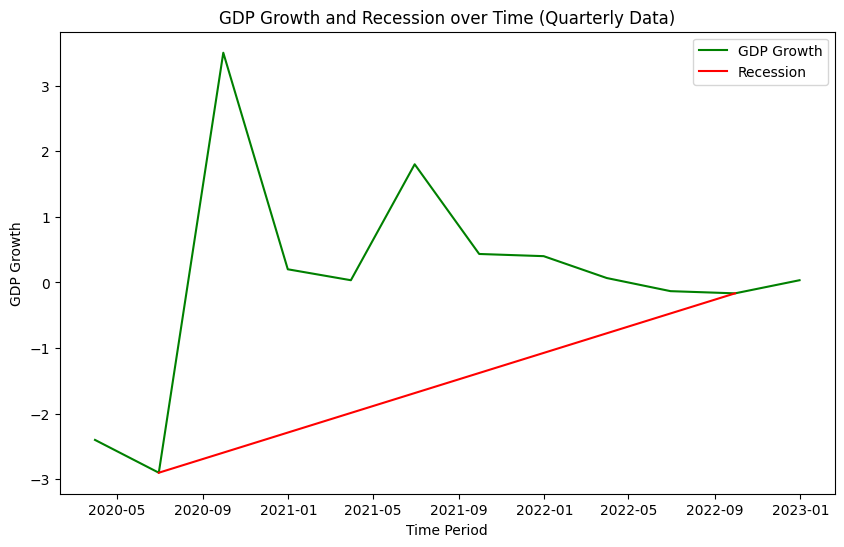

In [6]:
# Calculate recession based on quarterly GDP growth
quarterly_data['Recession'] = ((quarterly_data['GDP Growth'] < 0) & (quarterly_data['GDP Growth'].shift(1) < 0))

# Fill missing values with False (since the first quarter cannot be in a recession)
quarterly_data['Recession'].fillna(False, inplace=True)

# Create a figure and axis
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
ax = plt.gca()

# Plot GDP Growth
sns.lineplot(x=quarterly_data.index, y=quarterly_data['GDP Growth'], label='GDP Growth', ax=ax, color='green')

# Plot Recession periods
recession_periods = quarterly_data[quarterly_data['Recession']]
sns.lineplot(x=recession_periods.index, y=recession_periods['GDP Growth'], label='Recession', ax=ax, color='red')

# Set plot labels and title
plt.title('GDP Growth and Recession over Time (Quarterly Data)')
plt.xlabel('Time Period')
plt.ylabel('GDP Growth')

# Show legend
plt.legend()

plt.show()


*The red line shows the periods of negative GDP growth (considered recessions), and the green line shows the overall trend in GDP growth over time.*

*Let us now analyze the severity of the recession. The severity of a recession refers to the extent to which the economy contracts during a recession. A severe recession involves a deeper and more prolonged decline in economic activity, resulting in negative effects on employment, incomes and other economic indicators. Here’s how to analyze the severity of the recession:*

Text(0, 0.5, 'Duration/Severity')

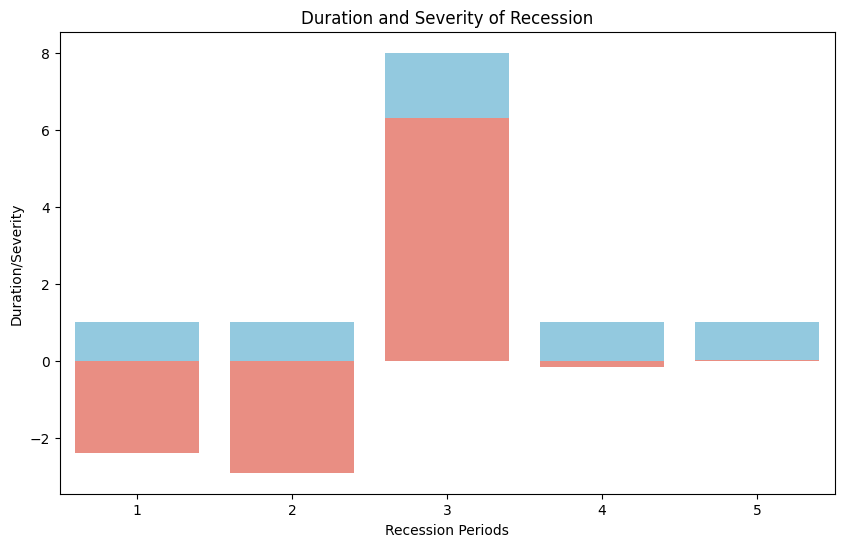

In [7]:
# Calculate Recession Start
quarterly_data['Recession Start'] = quarterly_data['Recession'].ne(quarterly_data['Recession'].shift()).cumsum()

# Group by Recession Start and calculate recession duration and severity
recession_periods = quarterly_data.groupby('Recession Start')
recession_duration = recession_periods.size()
recession_severity = recession_periods['GDP Growth'].sum()

# Create a figure and axis
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
ax = plt.gca()

# Plot recession duration
sns.barplot(x=recession_duration.index, y=recession_duration.values, color='skyblue', label='Recession Duration', ax=ax)

# Plot recession severity
sns.barplot(x=recession_severity.index, y=recession_severity.values, color='salmon', label='Recession Severity', ax=ax)

# Set plot labels and title
plt.title('Duration and Severity of Recession')
plt.xlabel('Recession Periods')
plt.ylabel('Duration/Severity')

# Show legend


*A recession is an economic situation that arrives when the circulation of money in the economy is low for two consecutive quarters. Recession is calculated and analyzed according to the growth in GDP, the growth in the unemployment rate, and the growth in consumer spending rate.*